In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [42]:
#loading mnist dataset
mnist = keras.datasets.mnist

#splitting into train and test set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print("The first element of Y is: ", Y_train[0])

The first element of Y is:  5


In [6]:
print("The first element of x is: ", X_train[0])

The first element of x is:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 21

In [7]:
%matplotlib inline

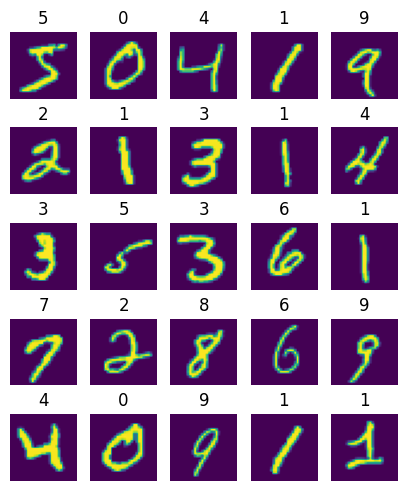

In [8]:
#Display images in x train with labels
fig = plt.figure(figsize=(5,6))

for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(Y_train[i])
    plt.axis('off')

In [43]:
#Reshape training examples to insert in neural network
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [44]:
#Normalizing inputs by dividing with 255(max)
X_train = X_train / 255
X_test = X_test / 255

In [12]:
print(X_train[0])
print(X_test[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu

model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(25, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='linear')
])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 25)                3225      
                                                                 
 dense_5 (Dense)             (None, 10)                260       
                                                                 
Total params: 103,965
Trainable params: 103,965
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [57]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2697 - accuracy: 0.9217
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1140 - accuracy: 0.9653
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0784 - accuracy: 0.9756
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0593 - accuracy: 0.9818
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0475 - accuracy: 0.9852
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.9881
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0308 - accuracy: 0.9898
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0276 - accuracy: 0.9910
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0230 - accuracy: 0.9925
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [58]:
model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - loss: 0.2929 - accuracy: 0.9769 - 545ms/epoch - 2ms/step


[0.2929378151893616, 0.9768999814987183]

In [27]:
import numpy as np

prediction = model.predict(X_test[0].reshape(1, 784))
print("Value to predict: ", Y_test[0])
print("Prediction: ", prediction)
print("Predicted number: ", np.argmax(prediction))

1/1 [==============================] - 0s 24ms/step
Value to predict:  7
Prediction:  [[-35.22754   -12.928896  -19.469181   -2.7261157 -35.404247    1.1148984
  -53.89623    14.721651   -5.9470925  -2.1057098]]
Predicted number:  7


In [28]:
def predict(num):    
    prediction = model.predict(X_test[num].reshape(1, 784))
    prediction_p = tf.nn.softmax(prediction)
    print("Predicted No.: ", np.argmax(prediction_p))
    print("True value: ", Y_test[num])

Prediction as probability:  tf.Tensor(
[[2.0292832e-22 9.8066227e-13 1.4161489e-15 2.6456380e-08 1.7005822e-22
  1.2321456e-06 1.5835509e-30 9.9999881e-01 1.0560353e-09 4.9200533e-08]], shape=(1, 10), dtype=float32)


In [ ]:
for i in range(10):
    print(f"Example {i+1}: ", predict(i))

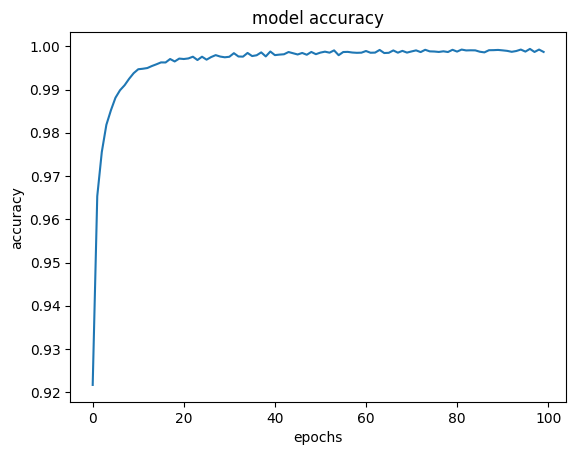

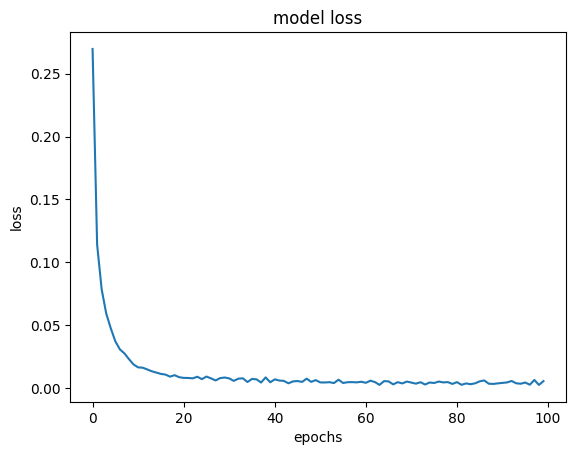

In [59]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

1/1 [==============================] - 0s 18ms/step


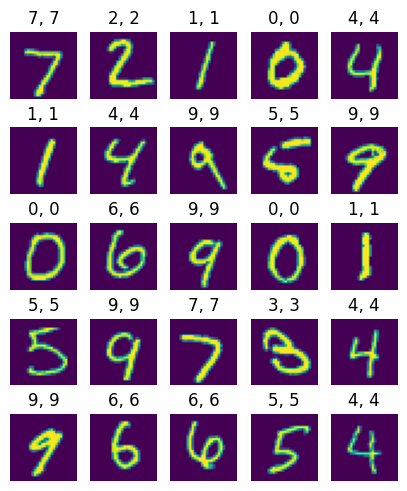

In [49]:
fig = plt.figure(figsize=(5,6))

for i in range(25):
    fig.add_subplot(5, 5, i+1)
    
    plt.imshow(X_test[i].reshape((28,28)))

    prediction = model.predict(X_test[i].reshape(1, 784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    plt.title(f"{Y_test[i]}, {yhat}")
    plt.axis('off')